In [9]:
import pandas as pd
import spline
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from merge_script import modify_first_column
import math
from sklearn.decomposition import PCA
import glob
import Calculate_Feature
import os
from spline import np_move_avg


def use_pca(featuer_data, n_components=5):
    pca = PCA(n_components)
    axis_fea = pca.fit_transform(featuer_data)  # 每个样本降为n_components维
    fea = []
    for raw in range(axis_fea.shape[0]):
        for ele in axis_fea[raw, :]:
            fea.append(ele)
    return fea


def axis_normalization(datalist, stage=1):
    normalized_data = []
    #datalist = np.array(datalist)
    for data in datalist:
        maximum = max(data)
        minimum = min(data)
        # print("maximum is:",maximum,"minimum is:",minimum)
        normalized_data.append([(item - minimum) / (maximum - minimum) * stage for item in data])
    return np.array(normalized_data)


def three_fuse(data):
    axis_num = int(data.shape[0] / 3)
    f_nd = []

    for f_in in range(axis_num):
        nd = []
        index = f_in * 3
        for i in range(data.shape[1]):
            d = data[:, i]
            fuse_data = math.sqrt(d[index] * d[index] + d[index + 1] * d[index + 1] + d[index + 2] * d[index + 2])
            nd.append(fuse_data)
        f_nd.append(nd)
    return f_nd

def conv_way(signal, kernal):
    convolved_signal = np.convolve(signal, kernal, mode='same')
    return convolved_signal

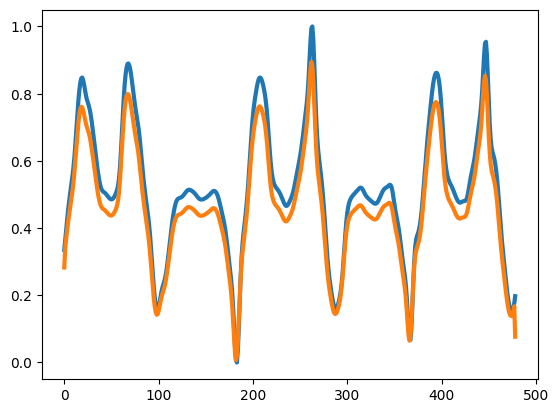

In [13]:
virtural_data_path05 = 'CorData-Seg/Virtual_New_Conv_0115_size3_spline4_240/0/HighKnee/HighKnee-1.csv'
df_05 = pd.read_csv(virtural_data_path05, index_col=False, header=0, usecols=[9, 10, 11])
df_05 = np.array(df_05).T

# fuse_df_08 = three_fuse(df_05)
# nor_df_08 = axis_normalization(fuse_df_08)
nor_df_08 = axis_normalization(df_05)


plt.plot(nor_df_08[0][:480],label = f'Original Signal',linewidth=3)

nor_df_08 = conv_way(nor_df_08[0], np.array([0.5, 0.3, 0.1]))
plt.plot(nor_df_08[:480],label = f'Original Signal',linewidth=3)